In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv("netflix_raw_data.csv")

### Looking at data

In [3]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Looking at the shape of frame

In [4]:
netflix.shape

(6234, 12)

### Checking the missing values

In [5]:
#Lets see if there is any missing data
for col in netflix.columns:
    prcnt_missing=np.mean(netflix[col].isnull())
    print(f"{col} - {prcnt_missing}%")
    

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 0.31584857234520375%
cast - 0.09143407122232916%
country - 0.0763554700032082%
date_added - 0.0017645171639396856%
release_year - 0.0%
rating - 0.0016041065126724415%
duration - 0.0%
listed_in - 0.0%
description - 0.0%


# Data cleaning

In [6]:
#If director , cast, country and rating values are nan for a row, we will change this values with Unknown

director,cast,country="Unknown","Unknown","Unknown"
rating="Unknown"

netflix["director"].fillna(director,inplace=True)
netflix["cast"].fillna(cast,inplace=True)
netflix["country"].fillna(country,inplace=True)
netflix["rating"].fillna(rating,inplace=True)



In [7]:
netflix["date_added"].isna().sum()

11

### Deleting values

In [8]:
#There was 11 values in date_added column. We cannot change it with unknown because it is a datatime
# We will delete this columns
netflix.dropna(axis=0,inplace=True)

### Looking at the data again

In [9]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,Unknown,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,Unknown,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,Unknown,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,Unknown,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


### Checking the null data last time

In [10]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Checking the duplicates

In [11]:
netflix.duplicated().sum()

0

### Copy the dataframe

In [12]:
df = netflix.copy()

### Parsing the date_added value into day month and year

In [13]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['month_added']=df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df['year_added'].astype(int);
df['day_added'].astype(int);

In [14]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,9,2019
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,9,2016
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8,9,2018
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8,9,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,9,2017


## Now our data is ready to create a dashboard for Tableau

In [15]:
df.to_csv('netflix_cleaned_data.csv',index=False)

# Data visualization

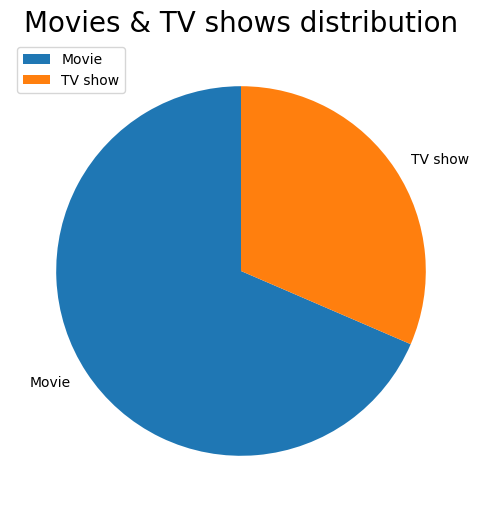

In [16]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(size,labels=labels,  startangle = 90)
plt.title('Movies & TV shows distribution', fontsize = 20)
plt.legend()
plt.show()